**Handwritten Digit Recognition Model**

**Importing Necessary Required Libraries**

In [158]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

**Loading the MNIST dataset from keras**

In [159]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [160]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [161]:
#Checking the shape of X_train which is 3D in dimension
X_train.shape

(60000, 28, 28)

In [162]:
#Checking the shape of X_test which is 3D in dimension
X_test.shape

(10000, 28, 28)

In [163]:
#Checking the features value of each feature in y_train(For eg:- at 0th index there is 5 and on 1st index 0 and so on)
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [164]:
#Checking the features value of each feature in y_test(For eg:- at 0th index there is 7 and on 1st index 2 and so on)
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

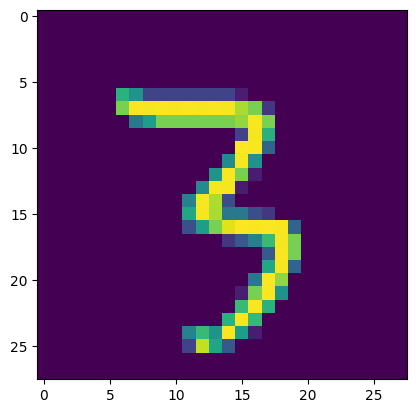

In [166]:
import matplotlib.pyplot as plt
plt.imshow(X_train[44])

**Scaling the pixel values to be in the range of 0 to 1 for normalization and also sigmoid function operates in this range**

In [167]:
X_train = X_train/255
X_test = X_test/255

In [168]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Building the Deep Learning Model**

In [169]:
model = Sequential()

#Flattening the Images of Data
model.add(Flatten(input_shape=(28,28)))

#Hidden Layers
model.add(Dense(32,activation='relu'))
model.add(Dense(128,activation='relu'))

#For multiple classification we use softmax
model.add(Dense(10,activation='softmax'))

In [170]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 32)                25120     
                                                                 
 dense_41 (Dense)            (None, 128)               4224      
                                                                 
 dense_42 (Dense)            (None, 10)                1290      
                                                                 
Total params: 30634 (119.66 KB)
Trainable params: 30634 (119.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [171]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [172]:
history = model.fit(X_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.3451 - accuracy: 0.8995 - val_loss: 0.1752 - val_accuracy: 0.9488
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1613 - accuracy: 0.9505 - val_loss: 0.1396 - val_accuracy: 0.9604
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1196 - accuracy: 0.9638 - val_loss: 0.1213 - val_accuracy: 0.9639
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0961 - accuracy: 0.9703 - val_loss: 0.1124 - val_accuracy: 0.9655
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0809 - accuracy: 0.9749 - val_loss: 0.1063 - val_accuracy: 0.9692


In [173]:
#Shows the probability of the feature value at the respective index
y_prob = model.predict(X_test)
y_prob

313/313 [==============================] - 1s 2ms/step


array([[1.3883779e-07, 3.5998894e-06, 6.5267191e-04, ..., 9.9718434e-01,
        3.1810068e-05, 1.6207337e-04],
       [5.2604060e-10, 3.2606315e-02, 9.6736407e-01, ..., 4.1281392e-09,
        2.5731151e-05, 8.4571091e-12],
       [1.3314326e-06, 9.9842751e-01, 2.3520926e-04, ..., 8.2829082e-04,
        1.8167557e-04, 6.3760649e-06],
       ...,
       [1.4756247e-11, 1.5433770e-07, 4.5806203e-08, ..., 9.9984572e-05,
        2.3818445e-06, 1.8387205e-04],
       [1.0911509e-10, 1.3229296e-06, 2.1981416e-12, ..., 6.1096721e-08,
        2.0539100e-04, 1.4461834e-09],
       [4.4197711e-11, 1.3494866e-12, 1.8424172e-11, ..., 6.0223609e-14,
        1.8973612e-09, 8.9442424e-14]], dtype=float32)

In [174]:
#Shows the predicted feature value at the respective index
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [175]:
#Accuracy of Test dataset
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.968

**Plotting the graphs for loss V/S val_loss and accuracy V/S val_accuracy**

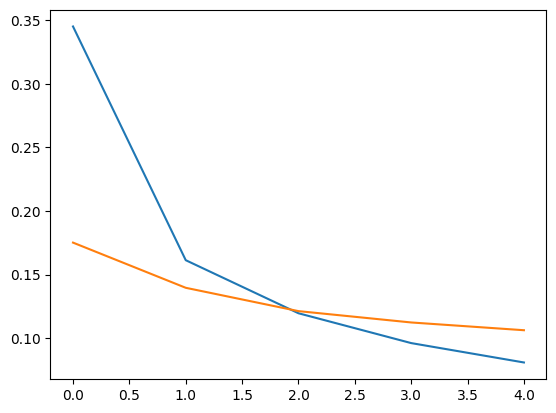

In [176]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

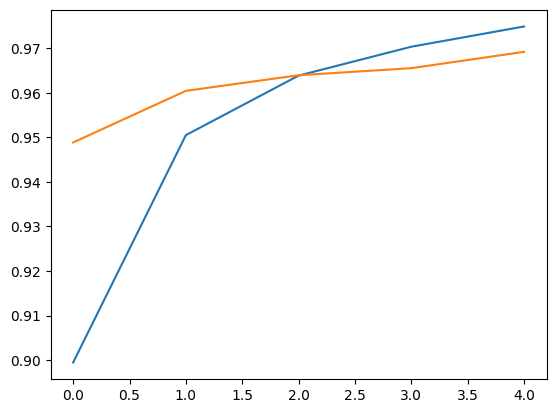

In [177]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

**Predicting the Handwritten Digit value from Test Data**

1/1 [==============================] - 0s 62ms/step
The Handwritten Digit is recognised as [5]


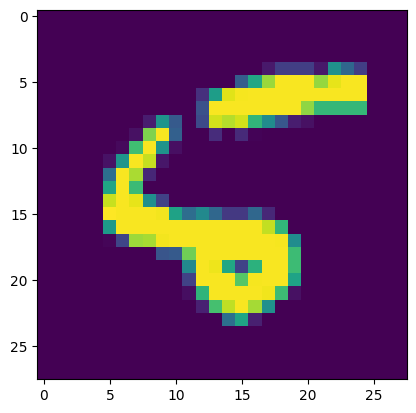

In [181]:
plt.imshow(X_test[8])
print("The Handwritten Digit is recognised as",model.predict(X_test[8].reshape(1,28,28)).argmax(axis=1))

**Predictive System on Unseen Data**

Path of the image to be predicted: /content/mnist0.jpg


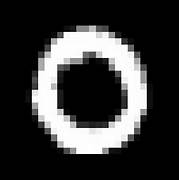

1/1 [==============================] - 0s 20ms/step
The Handwritten Digit is recognised as  0


In [185]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

#Displaying the Input Image
cv2_imshow(input_image)

#Performing Grayscaling to convert the RGB Colored image to Gray Color
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

#Resizing the Input Image
input_image_resize = cv2.resize(grayscale, (28, 28))

#Scaling the pixel values to be in the range of 0 to 1 because sigmoid function operates in this range
input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

#Predicting the value
input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)